In [2]:
import pandas as pd 
import numpy as np


In [3]:
df=pd.read_csv('FinalisedData-HealthSurvey(Classification).csv')

In [4]:
df=df.drop(columns='Unnamed: 0')

In [5]:
df1=df.select_dtypes(include='object')
df2=df.select_dtypes(exclude='object')

In [ ]:
df.dtypes

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
df.DepressionScoringRange.unique()

In [8]:
labelencoder = LabelEncoder()
for column in df1.columns:
  df[column] = labelencoder.fit_transform(df[column].astype(str))
scaler = MinMaxScaler()

df[df2.columns] = scaler.fit_transform(df[df2.columns])

In [7]:
labelencoder.classes_


array(['Borderline Depression', 'Mild-Moderate Depression',
       'Moderate-Severe Depression', 'No Depression Likely',
       'Possibly Mildly Depressed', 'Severely Depressed'], dtype=object)

Naives Bayes

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [10]:
X=df.drop(columns='DepressionScoringRange')
y=df.DepressionScoringRange

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0,test_size=0.15)

In [12]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)

In [17]:
accuracy = gnb.score(X_test, y_test)
print(accuracy)

0.16666666666666666


In [19]:
cm = confusion_matrix(y_test, gnb_predictions)

In [20]:
cm

array([[0, 1, 1, 0, 1, 0],
       [0, 1, 5, 1, 0, 0],
       [0, 1, 2, 0, 1, 0],
       [1, 0, 4, 1, 0, 0],
       [0, 1, 1, 0, 0, 0],
       [0, 1, 1, 0, 0, 0]], dtype=int64)

SMOTE for MultiClass

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
strategy = {0:100, 1:100, 2:200, 3:200, 4:200, 5:200}
oversample = SMOTE(sampling_strategy=strategy)
oversample = SMOTE()

In [24]:
X, y = oversample.fit_resample(X, y)

Class=4, n=48 (16.667%)
Class=3, n=48 (16.667%)
Class=1, n=48 (16.667%)
Class=0, n=48 (16.667%)
Class=5, n=48 (16.667%)
Class=2, n=48 (16.667%)


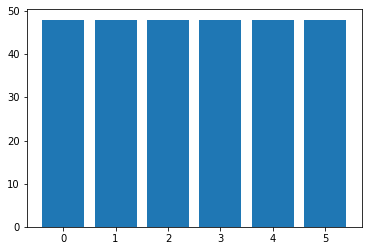

In [25]:
from collections import Counter
from matplotlib import pyplot
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Random Forest Classifier

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000)

In [27]:
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
scores = evaluate_model(X, y, model)

In [29]:
from numpy import mean
from numpy import std
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.764 (0.050)
